In [1]:
import keras 
from keras import layers
from keras import models
import numpy as np
import os

Using TensorFlow backend.


In [2]:
"""data = [img for img in os.listdir("Class/Corel10000") if img.endswith('.jpg')]""" #collecting the corel10000
pass

In [3]:
###Preprocessing code is written to prepare the data

"""import cv2
import matplotlib.pyplot as plt

for i in range(len(data)):
    img = cv2.imread(r"Class/Corel10000/"+data[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f"data/{data[i][:-4]}"+".jpg", img)
    print(f"written+{data[i][:-4]}")
    #plt.imshow(img)"""

pass

In [4]:
data = [r"data/"+img for img in os.listdir("data/") if img.endswith('.jpg')]

In [5]:
data

['data/0_1.jpg',
 'data/0_10.jpg',
 'data/0_100.jpg',
 'data/0_11.jpg',
 'data/0_12.jpg',
 'data/0_13.jpg',
 'data/0_14.jpg',
 'data/0_15.jpg',
 'data/0_16.jpg',
 'data/0_17.jpg',
 'data/0_18.jpg',
 'data/0_19.jpg',
 'data/0_2.jpg',
 'data/0_20.jpg',
 'data/0_21.jpg',
 'data/0_22.jpg',
 'data/0_23.jpg',
 'data/0_24.jpg',
 'data/0_25.jpg',
 'data/0_26.jpg',
 'data/0_27.jpg',
 'data/0_28.jpg',
 'data/0_29.jpg',
 'data/0_3.jpg',
 'data/0_30.jpg',
 'data/0_31.jpg',
 'data/0_32.jpg',
 'data/0_33.jpg',
 'data/0_34.jpg',
 'data/0_35.jpg',
 'data/0_36.jpg',
 'data/0_37.jpg',
 'data/0_38.jpg',
 'data/0_39.jpg',
 'data/0_4.jpg',
 'data/0_40.jpg',
 'data/0_41.jpg',
 'data/0_42.jpg',
 'data/0_43.jpg',
 'data/0_44.jpg',
 'data/0_45.jpg',
 'data/0_46.jpg',
 'data/0_47.jpg',
 'data/0_48.jpg',
 'data/0_49.jpg',
 'data/0_5.jpg',
 'data/0_50.jpg',
 'data/0_51.jpg',
 'data/0_52.jpg',
 'data/0_53.jpg',
 'data/0_54.jpg',
 'data/0_55.jpg',
 'data/0_56.jpg',
 'data/0_57.jpg',
 'data/0_58.jpg',
 'data/0_59.jp

In [8]:
li = []

model =models.Sequential()
model.add(layers.Conv2D(8, kernel_size=2, padding='valid', strides=1, activation='relu', input_shape=(128, 128, 1)))
model.add(layers.Conv2D(16, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Conv2D(64, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu', name='dense1'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(600, activation='relu', name='dense2'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(215, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='relu', name='dense4'))
model.add(layers.Dense(1, activation='tanh'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 127, 127, 8)       40        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 126, 126, 16)      528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 32)      2080      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 124, 124, 64)      8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 124, 124, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)       

In [9]:
train_data = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

In [10]:
test = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\Phd1\Class",
                                     target_size=(256, 256), classes = ['Corel10000'],
                                     class_mode='categorical', batch_size=64, seed=1)

Found 10000 images belonging to 1 classes.


In [11]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
from keras import backend as K

lis = []
i =  0
for j in data:
    #print(j)
    #print(i)
    if i < 500:
        j = test
        inp = model.input   # input placeholder
        outputs = [layer.output for layer in model.layers]    # all layer outputs
        #print(outputs)
        functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions
        #print(functors)

        # Testing
        test = np.random.random((128, 128, 1))[np.newaxis,...]
        layer_outs = lis.append([i([test, 1]) for i in functors if i == functors[-2]])
        #print(layer_outs)
    else:
        break
    i = i+1

In [13]:
testing = 'data/0_99.jpg'
#print(testing)

lis_test = []
inp = model.input   # input placeholder
outputs = [layer.output for layer in model.layers]    # all layer outputs
#print(outputs)
functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions
#print(functors)
#print(functors) # Testing
testing = np.random.random((128, 128, 1))[np.newaxis,...]

layer_outs = lis_test.append([i([testing, 1]) for i in functors if i == functors[-2]])

In [14]:
(lis[3][0][0][0])

array([0.04973491, 0.        , 0.        , 0.        , 0.        ,
       0.18542169, 0.13903879, 0.        , 0.        , 0.08199579],
      dtype=float32)

In [15]:
#lis_test[0][0][0][0]

In [16]:
#len(lis)

In [17]:
#lis_test[0][0][0][0]

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
distances = {}
for i in range(len(lis)):
    distances[data[i]] = sum(euclidean_distances(lis[i][0][0][0].reshape(1, -1), lis_test[0][0][0][0].reshape(1, -1))).sum()

In [20]:
sorted_dict = {k: v for k, v in sorted(distances.items(), key=lambda item: item[1])}

In [21]:
print(sorted_dict)

{'data/13_1322.jpg': 0.012027408, 'data/13_1378.jpg': 0.014144305, 'data/10_1054.jpg': 0.017358046, 'data/0_66.jpg': 0.018742703, 'data/13_1327.jpg': 0.024703791, 'data/11_1186.jpg': 0.026019553, 'data/0_78.jpg': 0.026594492, 'data/11_1138.jpg': 0.028182207, 'data/0_32.jpg': 0.035936087, 'data/13_1348.jpg': 0.03758401, 'data/11_1136.jpg': 0.03847964, 'data/0_30.jpg': 0.04082133, 'data/12_1280.jpg': 0.04237085, 'data/13_1333.jpg': 0.044389762, 'data/12_1277.jpg': 0.045461457, 'data/13_1345.jpg': 0.046847466, 'data/0_83.jpg': 0.04880835, 'data/11_1130.jpg': 0.048817884, 'data/0_71.jpg': 0.0503561, 'data/0_96.jpg': 0.050881725, 'data/10_1066.jpg': 0.051236592, 'data/12_1234.jpg': 0.052733153, 'data/12_1287.jpg': 0.05334438, 'data/12_1226.jpg': 0.053567845, 'data/0_15.jpg': 0.053704772, 'data/11_1199.jpg': 0.054832596, 'data/11_1135.jpg': 0.05548462, 'data/0_7.jpg': 0.055996597, 'data/11_1148.jpg': 0.05909304, 'data/0_98.jpg': 0.059132677, 'data/13_1379.jpg': 0.059928242, 'data/10_1035.jpg

In [22]:
import cv2
import matplotlib.pyplot as plt

data/13_1322.jpg 0.012027408


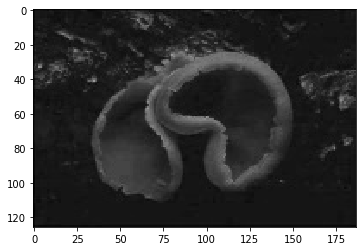

In [23]:
img = cv2.imread(list(sorted_dict.keys())[1])
print(list(sorted_dict.keys())[0],list(sorted_dict.values())[0] )
plt.imshow(img)

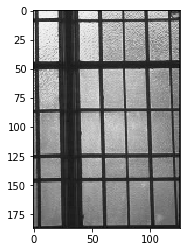

In [24]:
img = cv2.imread('data/0_99.jpg')
plt.imshow(img)